In [ ]:
# install necessary library Update teste
!pip install ucimlrepo

In [ ]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# load dataset
# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)


# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# Data Exploration

In [ ]:
# print info
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 208.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   3810 non-null   object
dtypes: object(1)
memory usage: 29.9+ KB


In [ ]:
# get stat of features
X.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [ ]:
# check if there is null value in features
X.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64

In [ ]:
# check number of target and count of each target
y['Class'].value_counts()

Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

In [ ]:
# normalization feature
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[0.67593733, 0.87923163, 0.90121587, ..., 0.88801055, 0.69391702,
        0.20757716],
       [0.62533005, 0.71409491, 0.64808716, ..., 0.69197987, 0.64600914,
        0.32456423],
       [0.62339377, 0.75006612, 0.73434911, ..., 0.78984635, 0.63563643,
        0.53857594],
       ...,
       [0.43002992, 0.44045819, 0.40864083, ..., 0.60847407, 0.43266526,
        0.35564534],
       [0.20515754, 0.17532451, 0.16992207, ..., 0.56901705, 0.20868495,
        0.44453926],
       [0.34175321, 0.24088172, 0.16869838, ..., 0.28376388, 0.34001406,
        0.84022485]])

In [60]:
# One hot encoding the target column
one_hot = OneHotEncoder()
y_one_hot = one_hot.fit_transform(y.values.reshape(-1,1)).toarray()
y_one_hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

# Data Plotting

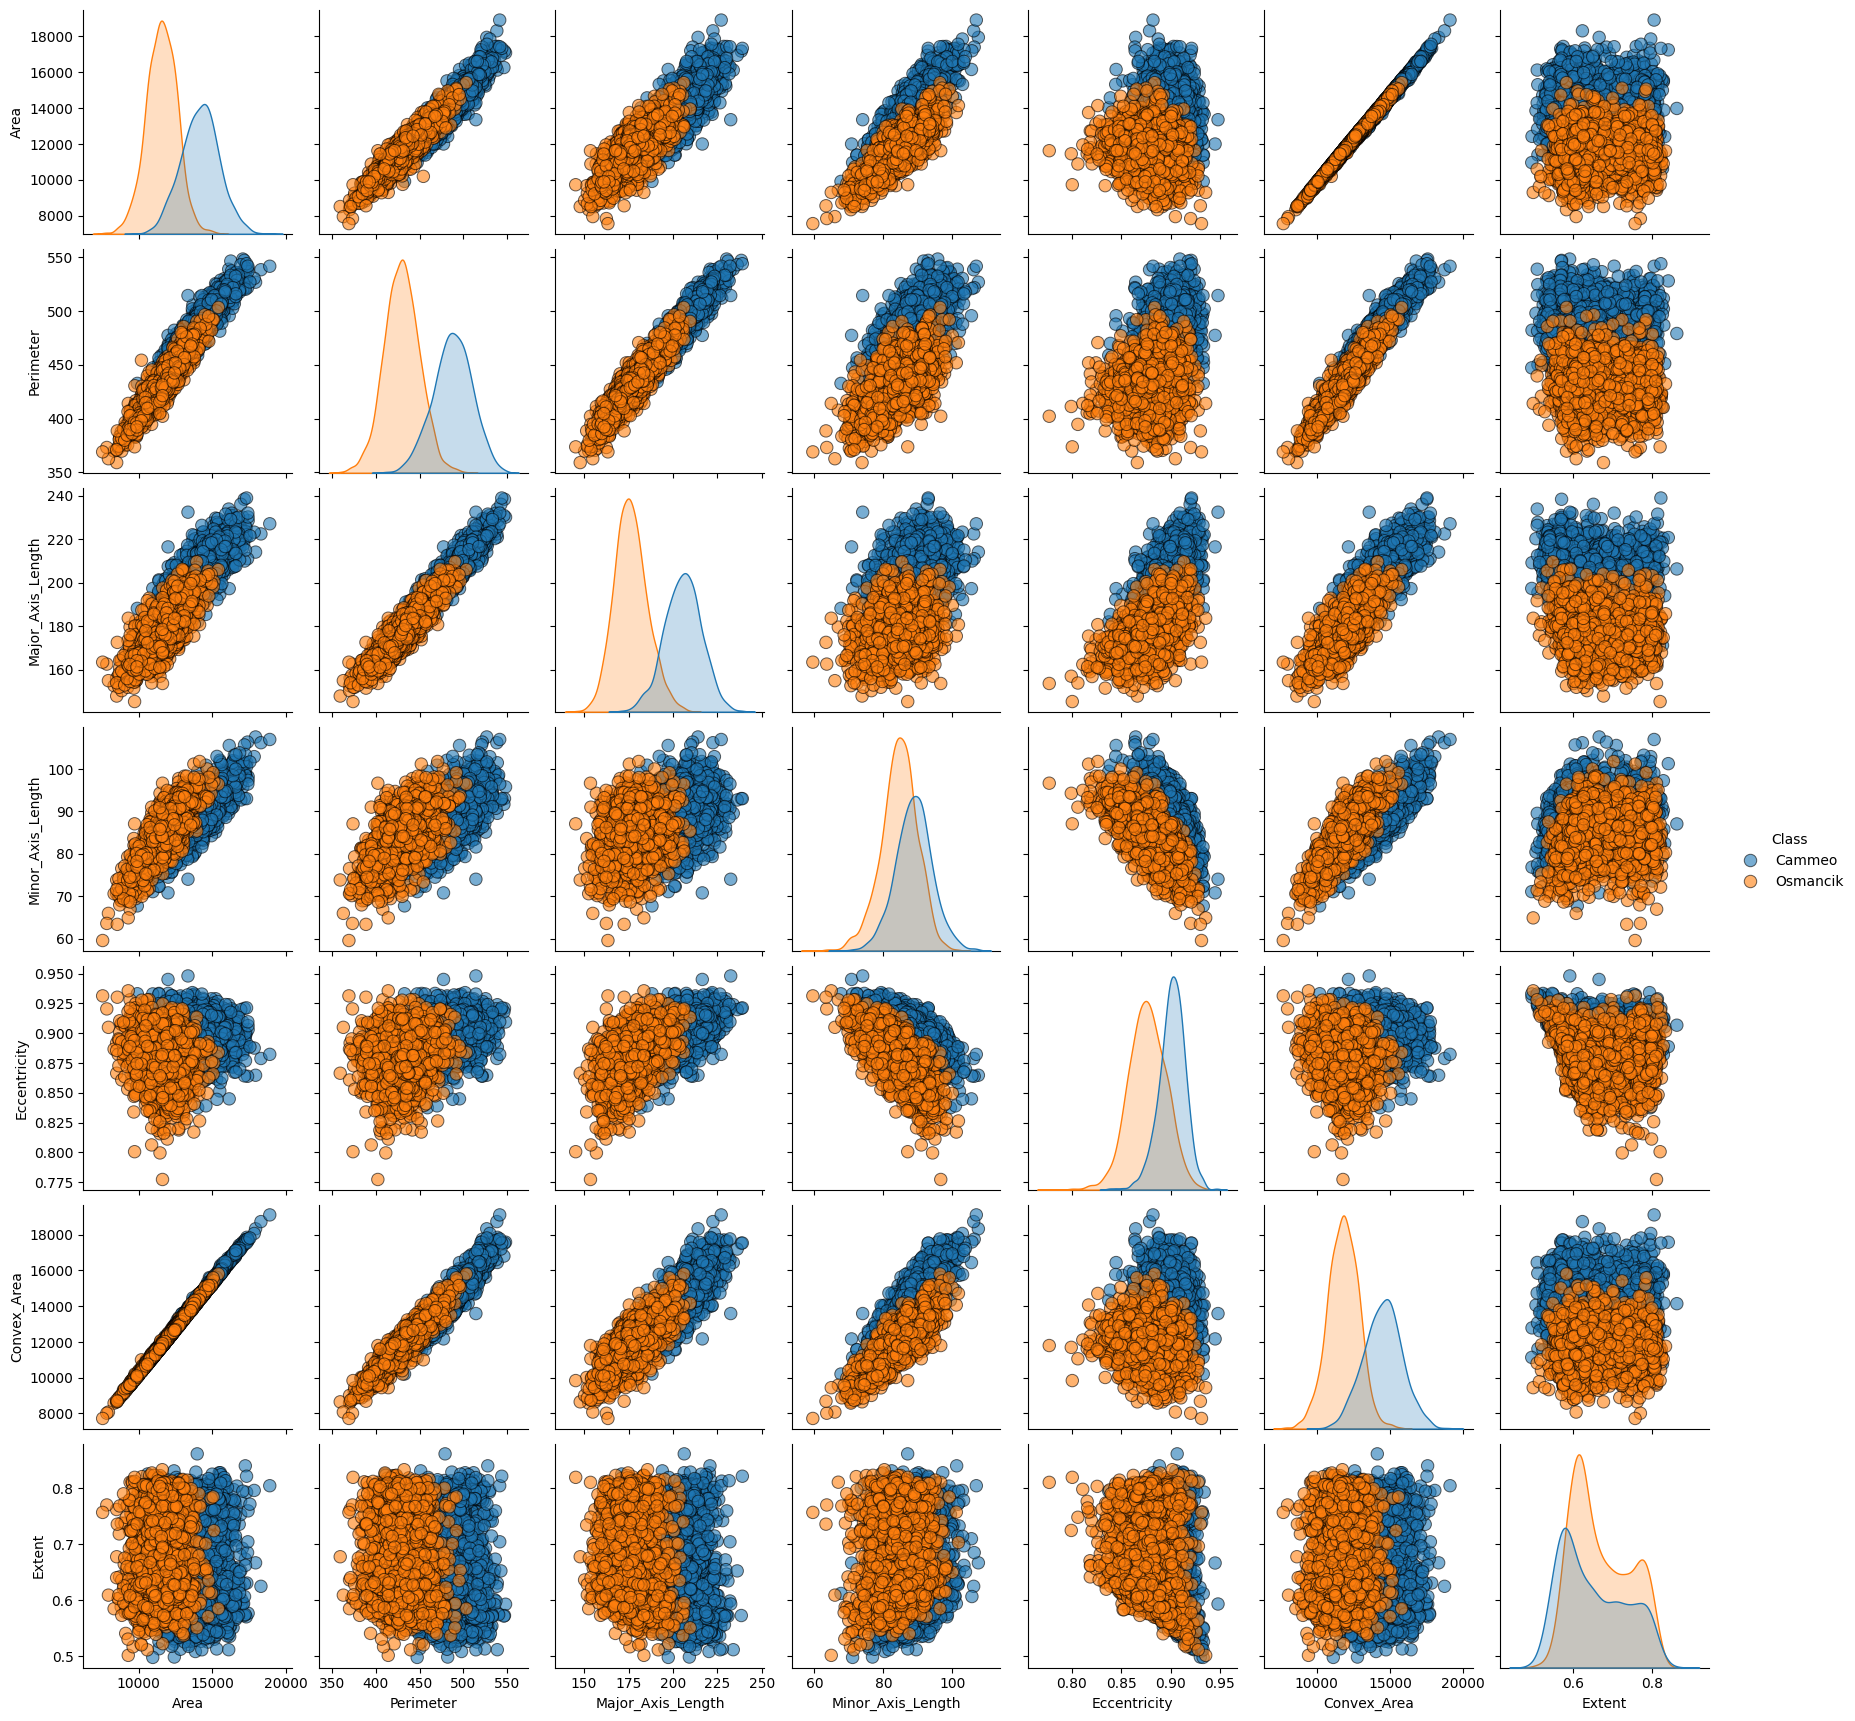

In [ ]:
pd_rice = pd.DataFrame(rice_cammeo_and_osmancik.data.original)
sns.pairplot(pd_rice, hue='Class',diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

<ipython-input-24-6258940ca234>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd_rice.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


<Axes: >

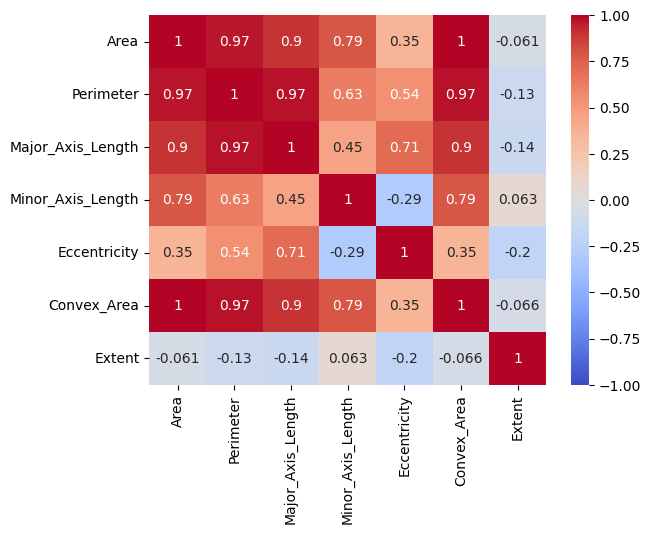

In [ ]:
sns.heatmap(pd_rice.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

## Visual Histograms

In [ ]:
import matplotlib.pyplot as plt


<Figure size 2000x1600 with 0 Axes>

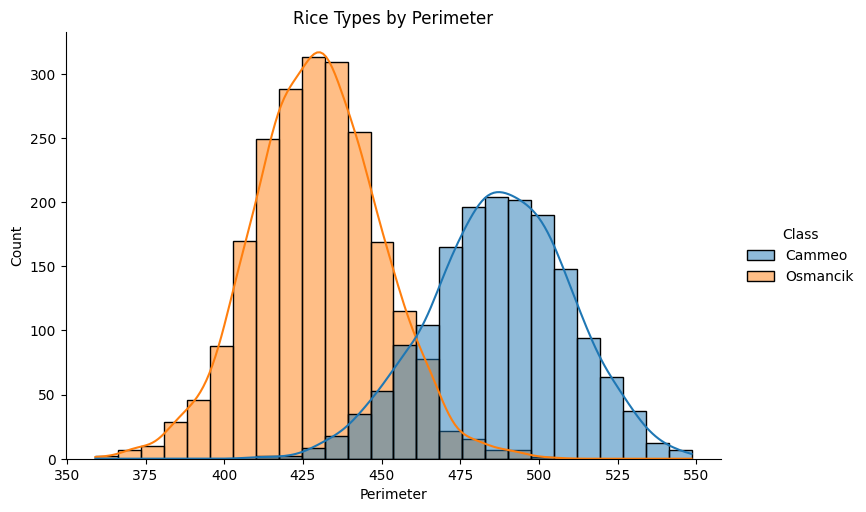

In [ ]:
plt.figure(figsize=(10, 8), dpi=200)
sns.displot(data=pd_rice, x="Perimeter", kde=True, hue="Class", aspect=1.5)
plt.title(f"Rice Types by Perimeter")
plt.show()

<Figure size 2000x1600 with 0 Axes>

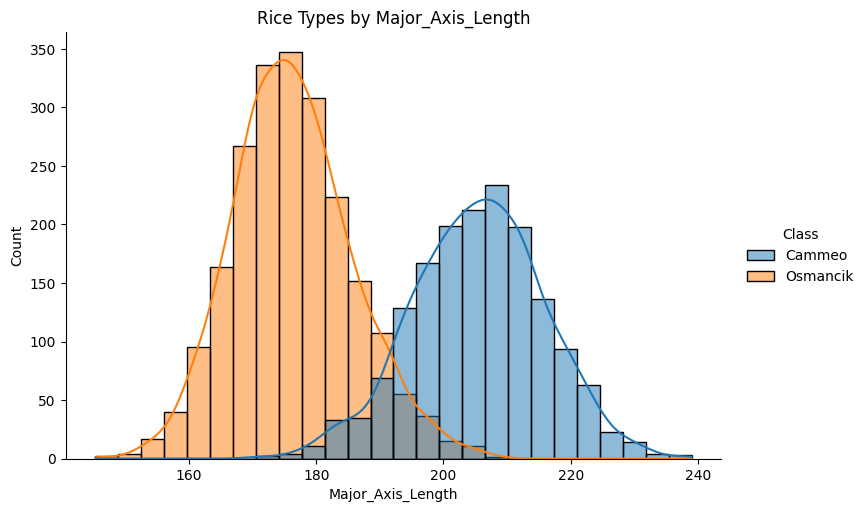

In [ ]:
plt.figure(figsize=(10, 8), dpi=200)
sns.displot(data=pd_rice, x="Major_Axis_Length", kde=True, hue="Class", aspect=1.5)
plt.title(f"Rice Types by Major_Axis_Length")
plt.show()

<Figure size 2000x1600 with 0 Axes>

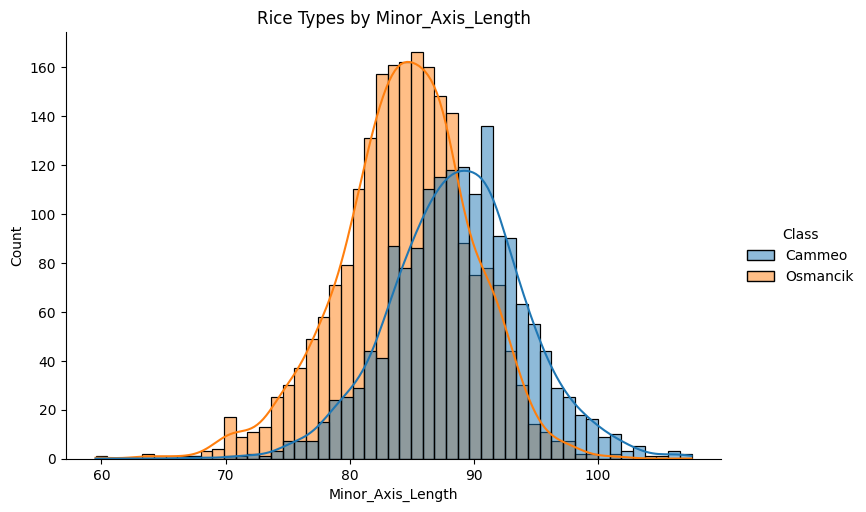

In [ ]:
plt.figure(figsize=(10, 8), dpi=200)
sns.displot(data=pd_rice, x="Minor_Axis_Length", kde=True, hue="Class", aspect=1.5)
plt.title(f"Rice Types by Minor_Axis_Length")
plt.show()

<Figure size 2000x1600 with 0 Axes>

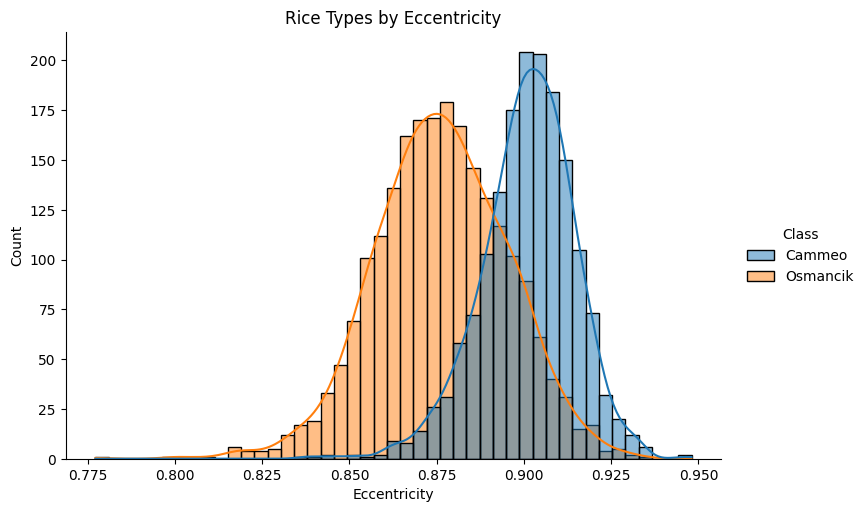

In [ ]:
plt.figure(figsize=(10, 8), dpi=200)
sns.displot(data=pd_rice, x="Eccentricity", kde=True, hue="Class", aspect=1.5)
plt.title(f"Rice Types by Eccentricity")
plt.show()

<Figure size 2000x1600 with 0 Axes>

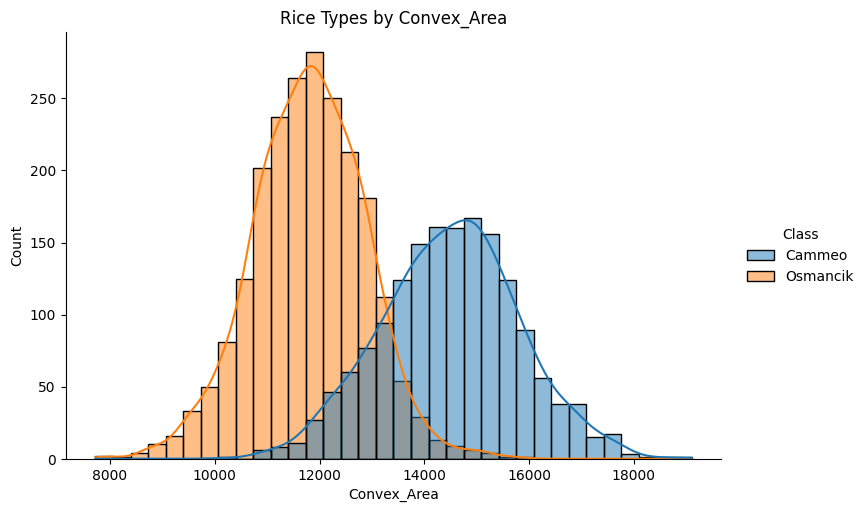

In [ ]:
plt.figure(figsize=(10, 8), dpi=200)
sns.displot(data=pd_rice, x="Convex_Area", kde=True, hue="Class", aspect=1.5)
plt.title(f"Rice Types by Convex_Area")
plt.show()

<Figure size 2000x1600 with 0 Axes>

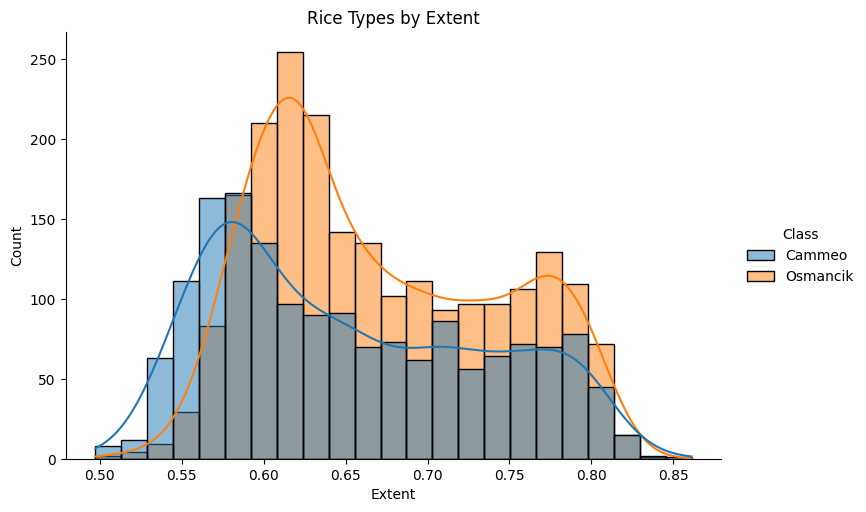

In [ ]:
plt.figure(figsize=(10, 8), dpi=200)
sns.displot(data=pd_rice, x="Extent", kde=True, hue="Class", aspect=1.5)
plt.title(f"Rice Types by Extent")
plt.show()